# Gaussian process latent variable model

In this section we will focus on formulating a probabilistic models that will allow us to represent the original data $Y$ in some lower dimensional embedded space $X$ that is not constrained to be linear. The generative approaches we will study can be seen as a nonparametric and nonlinear extension of the probabilistic principal component analysis studied in the first section. We will refer to the variables governing the lower dimensional space as latent variables which will encode the distribution of intrinsic structure of the data. 
Let’s assume that we are given a set of centred $D$-dimensional data $Y = \left[ y_1\dots y_N \right]^T$. We denote the $M$-dimensional latent variable associated with each data point by $x_i$.

Gaussian processes are a class of probabilistic models which specify distributions over function spaces. While a function is an infinite dimensional object, a distribution over the function space can be considered by focussing only on points where the function is instantiated. In Gaussian processes the distribution over these instantiations is taken to be Gaussian. Modelling with Gaussian processes consists of first specifying a Gaussian process prior. Usually a Gaussian distribution is parameterised by a mean and a covariance. In the case of Gaussian processes the mean and covariance must be functions of the space on which the process operates. Typically the mean function is taken to be zero, while the covariance function is necessarily constrained
to produce positive definite matrices. Consider a simple Gaussian process prior over the space of functions that are fundamentally linear, but are corrupted by Gaussian noise of variance $\beta^{-1}\textbf{I}$. The covariance function, or kernel, for such a prior is given by
\begin{equation}
\kappa\left(x_i, x_j\right) = x_i^T x_j + \beta^{-1}\delta_{ij},
\end{equation}
where $x_i$ and $x_j$ are vectors from the space of inputs to the function and $\delta_{ij}$ is the Kronecker delta.  If these inputs were taken from our embedding matrix, $X$, and the covariance function was evaluated
at each of the $N$ points we would recover a covariance matrix of the form $K = XX^T +\beta^{-1}\textbf{I}$ where the element at the $i$-th row and $j$-th column of $K$ is given by $\kappa\left(x_i, x_j\right)$. 



The Gaussian process latent variable model (GP-LVM) leverages the flexibility of the Gaussian processes to specify in a way a rich generalization of the probabilistic principal component analysis introduced earlier. Recall that probabilistic PCA assumes a generative model which describes the data distribution and implies that your high dimensional data $Y$ can be generated by applying a linear transoformation on some lower dimensional latent variables $X$ which we assume are zero-mean Gaussians defined on this lower dimensional space: $y_i = Wx_i + \epsilon$ with $\epsilon ~ \mathcal{N}\left(\textbf{0},\sigma \textbf{I}\right)$ and $x_i ~ \mathcal{N}(0,\textbf{I})$. 
The GP-LVM allows us to model $Y$ more generally as $Y = f\left(X\right) + \epsilon$ where $f$ is modelled with a Gaussian process. Now how is this achieved more specifically?
The model assumtion made in the probabilistic PCA implies that the likelihood (the probability of the data) can be written as:
\begin{equation}
p\left(y_i|x_i, W, \sigma\textbf{I}\right) = \mathcal{N}\left(y_i|Wx_i, \sigma\textbf{I}\right)
\end{equation}
After some algebra, we saw that this implies that we can express the likelihood in terms of $W$ explicitly as:
\begin{equation}
p\left(y_i|W, \sigma\textbf{I}\right) = \mathcal{N}\left(y_i|\textbf{0}, WW^T\sigma\textbf{I}\right)
\end{equation}
Now (Lawrence, 2005) showed that equivalently we can also express the likelihood in probabilistic PCA in terms of the latent variables $x$ as:
\begin{equation}
p\left(y_{:,d}|X, \sigma\right) = \mathcal{N}\left(y_{:,d}|\textbf{0}, XX^T\sigma\textbf{I}\right)
\end{equation}
where note that $p\left((Y|X,\sigma\right) = \prod_{d=1^{D}}p\left(y_{:,d}|X, \sigma\right)$ and $p\left((Y|W,\sigma\right) = \prod_{i=1^{N}}p\left(y_{i}|W, \sigma\right)$. This means that essentially so far the two marginal likelihoods originate from the same model and specify the same assumptions about the distribution of the data and its lower dimensional generating process. The main practical difference in using the likelihood with respect to $W$, $p\left((Y|W,\sigma\right)$, or the one with respect to $X$, $p\left((Y|X,\sigma\right)$, is going to be which quantities do we optimize during training. However, from statistical prespective, the second likelihood $p\left((Y|X,\sigma\right)$ allows us to define the GP-LVM as a generalization of the probabilistic PCA. 

$\textbf{GP-LVM:}$ The assumed likelihood of the data if we are using the Gaussian process latent variable model takes the form: 
\begin{equation}
p\left(y_{:,d}|X,\sigma\right) = \mathcal{N}\left(y_{:,d}|\textbf{0},\textbf{K}\right)
\end{equation}
where $K$ denotes the covariance matrix of the underlying Gaussian process determined. $K$ depends on the choice of kernel for the GP governing our model where note that if we choose the linear kernel $\kappa\left(x_i, x_j\right) = x_i^T x_j + \beta^{-1}\delta_{ij}$ from above, we would recover the probabilistic PCA. However, now depending on the kernel choice (and parameters) we can also infer many types of nonlinear relations between the high dimensional data and existing lower dimensional projections of it. For example, a very common approach is the GP-LVM with radial basis function (RBF) kernel:
\begin{equation}
\kappa(x_i,x_j) = \theta_{rbf}\exp\left(-\frac{\gamma}{2}(x_i - x_j)^T(x_i - x_j)\right) + \theta_{bias} + \theta_{white}\delta_{ij}
\end{equation}
where $\theta_{rbf}$, $\theta_{bias}$, $\theta_{white}$ and $\gamma$ are parameters of the kernel specifying its shape and properties. Every set of parameters will define a whole distribution over certain function which describe the transformation maps that we can apply on the data to try and "reduce" it to fewer dimensions. Note that this is just like sets of means and variances specify distributions over univariate random variables. 

Once we have chosen a kernel function for our GP, the likelihood function of the GP-LVM is fully specified and we can proceed with $\textbf{training}$ our model by optimizing the likelihood jointly with respect to the unknown variables and parameters. Recall that in theory in expectation maximization algorithms this is done by differentiating the likelihood function with respect to the unknowns one at a time, holding the rest fix. Then we check when each derivative equates to $0$ and make this our update value for that parameter. Then we proceed with the next one (of course sometimes this is harder then it sounds). In the case of GP-LVM with an RBF kernel, we optimize jointly the likelihood with respect to the latent variables $X$ and the kernel parameters $\theta_{rbf}$, $\theta_{bias}$, $\theta_{white}$ and $\gamma$. This optimization can be done using many nonlinear optimizers, but a standard approach is to using $\textit{scaled conjugate gradient}$ initialized with $\theta_{rbf} = \gamma = 1$ and $\theta_{white} = \theta_{bias} = \exp(-1)$. We will not be studying and manually implementing the scaled conjugate gradient algorithm (although it will be hidden part of the packages we will use), but for the enthusiastic readers see http://www.dcs.shef.ac.uk/~neil/gplvmapp/.

# GP-LVM implementation and practice

There are many freely available implementations of different Gaussian process models for MATLAB, R, Python and other enviroments. Ignoring the enviroments differences, another crucial distinction is inference method used to learn the Gaussian processes in the different libraries: Hamiltonian Monte Carlo methods; variational methods and others. We will not go into depth comparing different enviroments and for the purpose of this course we will use the GPy library (https://sheffieldml.github.io/GPy/).

$\textbf{Note:}$ If you struggle with the installing of this package on Python, do not hesitate to contact me! If you wish to choose different GP implementation or different enviroment such as MATLAB, feel welcome to do so.

We start by uploading the libraries we will use in the demo below:

In [33]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import GPy
import string

In [34]:
import matplotlib.pylab as pb
colors = ["#3FCC94", "#DD4F23", "#C6D63B", "#D44271", 
          "#E4A42C", "#4F9139", "#6DDA4C", "#85831F", 
          "#B36A29", "#CF4E4A"]
def plot_model(X, which_dims, labels):
    fig = pb.figure(); ax = fig.add_subplot(111)
    X = X[:,which_dims]
    ulabs = []
    for lab in labels:
        if not lab in ulabs:
            ulabs.append(lab)
            pass
        pass
    for i, lab in enumerate(ulabs):
        ax.scatter(*X[labels==lab].T,marker='o',color=colors[i],label=lab)
        pass
    pass

I will use a dataset called `digits.npy` containing all handwritten digits from $0 \cdots 9$ handwritten, provided by deCampos et al. [2009]. We will only use some of the digits for the demonstrations in this lab class, but you can edit the code below to select different subsets of the digit data as you wish.

In [35]:
which = [0,1,2,6,7,9] # which digits to work on
data = GPy.util.datasets.decampos_digits(which_digits=which)
Y = data['Y']
labels = data['str_lbls']

You can plot some of the digits using `pb.matshow`.

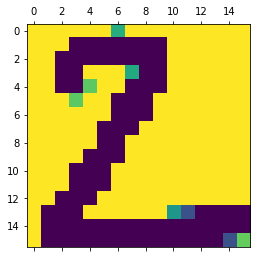

In [36]:
YY=Y[150,:].reshape(16,16)
pb.matshow(YY)

$\textbf{Note:}$ We are assuming a simple zero mean GP-LVM version for comparison and illustration here. However, the GP-LVM as well as the probailistic PCA models can be extended to include a non-zero mean bias to the projection.  

In [37]:
Yn = Y#Y-Y.mean()

In [38]:
from GPy.util import pca
p = pca.PCA(Y) # create PCA class with digits dataset

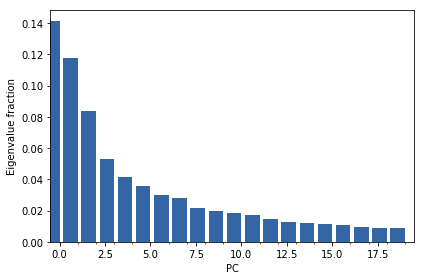

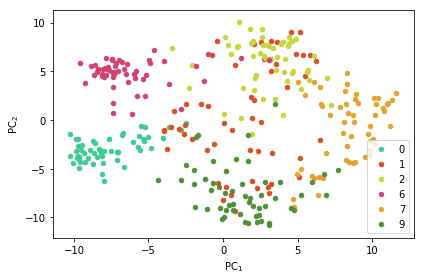

In [39]:
p.plot_fracs(20) # plot first 20 eigenvalue fractions
p.plot_2d(Y,labels=labels.flatten(), colors=colors)
pb.legend()

Let us now train a GPLVM with linear (ARD) kernel and check how does it compare empirically to PCA.

 /home/CAMPUS/raykovy/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


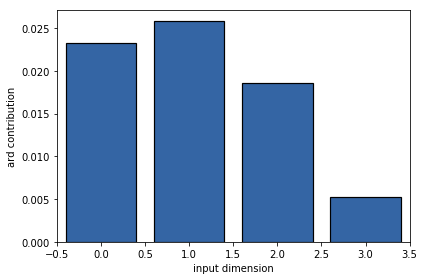

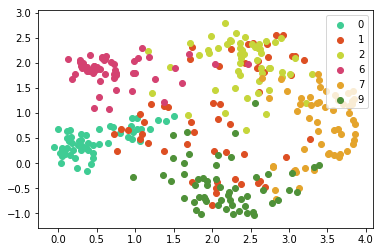

In [40]:
input_dim = 4 # How many latent dimensions to use
kernel = GPy.kern.Linear(input_dim, ARD=True) # ARD kernel
m = GPy.models.GPLVM(Yn, input_dim=input_dim, kernel=kernel)

m.optimize(messages=1, max_iters=1000) # optimize for 1000 iterations
m.kern.plot_ARD()
plot_model(m.X, m.linear.variances.argsort()[-2:], labels.flatten())
pb.legend()

As you can see the solution with a linear kernel is the same as the PCA solution with the exception of rotational changes and axis flips.

For the sake of time, the solution you see was only running for 1000 iterations, thus it might not be converged fully yet. The GP-LVM proceeds by iterative optimization of the *inputs* to the covariance. As we saw in the lecture earlier, for the linear covariance, these latent points can be optimized with an eigenvalue problem, but generally, for non-linear covariance functions, we are obliged to use gradient based optimization.

$\textbf{Questions:}$

a) How do your linear solutions differ between PCA and GPLVM with a linear kernel? Look at the plots and also try and consider how the linear ARD parameters compare to the eigenvalues of the principal components.

b) The next step is to use a non-linear mapping between inputs $X$ and ouputs $Y$ by selecting the exponentiated quadratic `GPy.kern.rbf` covariance function.

c) How does the nonlinear model differs from the linear model? Are there digits that the GPLVM with an exponentiated quadratic covariance can separate, which PCA is not able to?

d) Try modifying the covariance function and running the model again. For example you could try a combination of the linear and exponentiated quadratic covariance function or the Matern 5/2. If you run into stability problems try initializing the covariance function parameters differently